## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [6]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv('/home/user/ML LAB/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
#2 Check the shape of the DataFrame (rows, columns)
print(df.shape)

(545, 13)


In [8]:
#3 Look at the data types of the columns
print(df.dtypes)

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


In [9]:
#4 Check for missing  values if any, replace with appropriate values

# Checking for missing values
print("\nMissing values in dataset:")
print(df.isnull().sum())

# Handling missing values (filling with median)
df.fillna(df.median(numeric_only=True), inplace=True)

print("cols:",df.columns)



Missing values in dataset:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
cols: Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [10]:
#5 Prepare  X (independent variables) and y (dependent variable)
# Selecting features (independent variables) and target (dependent variable)
#features = ["area", "bedrooms", "bathrooms", "parking"]  # Update column names based on dataset
features = ["area",	"bedrooms",	"bathrooms", "stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]
target = "price"

X = df[features]  # Independent variables
y = df[target]  # Dependent variable



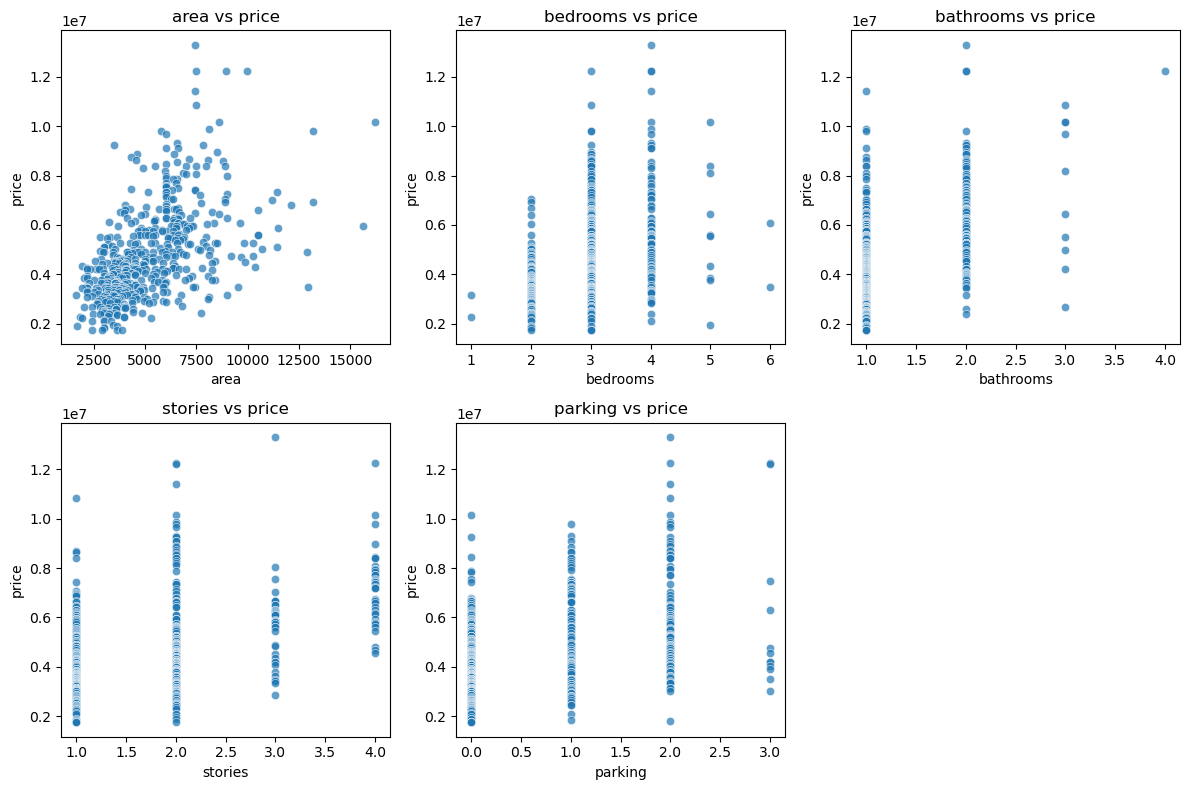

/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf va

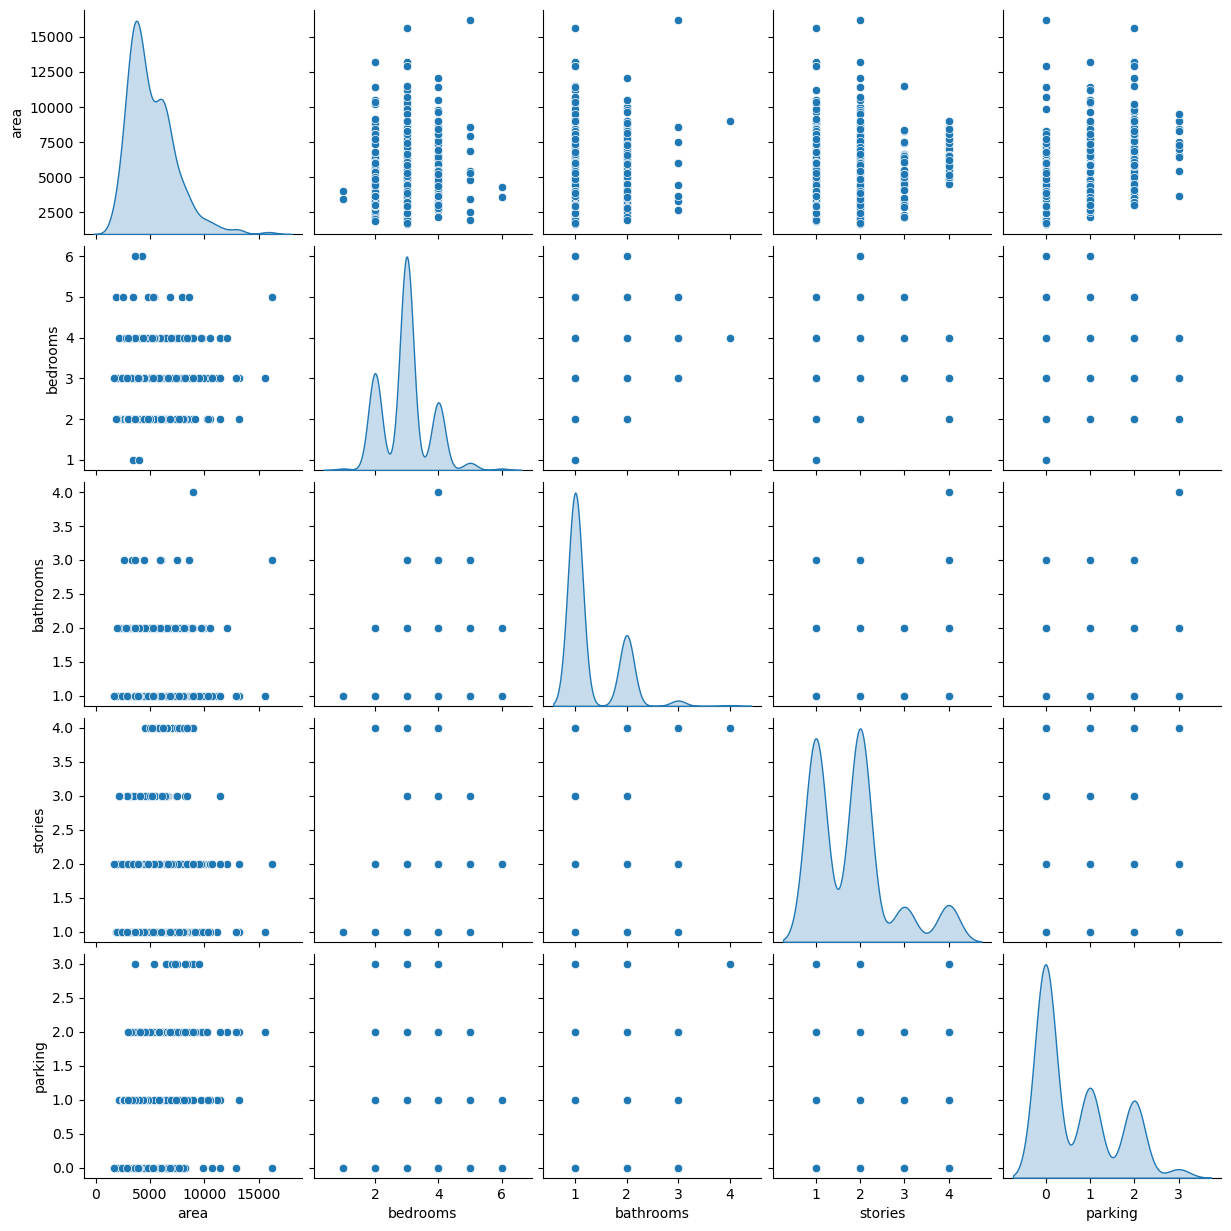

In [11]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# 🔹 Replace infinite values with NaN to prevent errors
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Selecting only numerical features
numerical_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
target = "price"

# Create scatterplots for each numerical feature vs. price
plt.figure(figsize=(12, 8))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Arranging in a grid (2 rows, 3 columns)
    sns.scatterplot(x=df[col], y=df[target], alpha=0.7)
    plt.xlabel(col)
    plt.ylabel(target)
    plt.title(f"{col} vs {target}")

plt.tight_layout()
plt.show()
# Selecting categorical features
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
# Create a pairplot
sns.pairplot(df[numerical_features], diag_kind="kde")  # kde for smooth distribution in histograms
plt.show()

# # Create boxplots for each categorical feature vs. price
# plt.figure(figsize=(12, 8))

# for i, col in enumerate(categorical_features, 1):
#     plt.subplot(3, 3, i)  # Arranging in a grid
#     sns.boxplot(x=df[col], y=df[target])
#     plt.xlabel(col)
#     plt.ylabel(target)
#     plt.title(f"{col} vs {target}")

# plt.tight_layout()
# plt.show()



In [12]:
#7 Encoding categorical data in X
import pandas as pd

# List of categorical features
categorical_features = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(df[categorical_features], drop_first=True)

# Merge with numerical features
numerical_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]
X_final = pd.concat([df[numerical_features], X_encoded], axis=1)

# Display encoded dataset
# print(X_final.head())
X.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [13]:
#8  Avoiding the Dummy Variable Trap
#it means to avoid multicollinearity we use drop_first=true
# its already done above

In [14]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Selecting numerical features
numerical_features = ["area", "bedrooms", "bathrooms", "stories", "parking"]

# Applying Standardization (Z-score Scaling)
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Alternatively, you can use Min-Max Scaling:
# scaler = MinMaxScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display scaled data
print(df[numerical_features].head())


       area  bedrooms  bathrooms   stories   parking
0  1.046726  1.403419   1.421812  1.378217  1.517692
1  1.757010  1.403419   5.405809  2.532024  2.679409
2  2.218232  0.047278   1.421812  0.224410  1.517692
3  1.083624  1.403419   1.421812  0.224410  2.679409
4  1.046726  1.403419  -0.570187  0.224410  1.517692


In [18]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split

# Selecting Features and Target Variable
features = ["area", "bedrooms", "bathrooms", "stories", "parking", 
            "mainroad", "guestroom", "basement", "hotwaterheating", 
            "airconditioning", "prefarea", "furnishingstatus"]

target = "price"

# Splitting the data into 70% Train and 30% Test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], 
                                                    test_size=0.3, random_state=42)

# Display the shapes of train and test sets
print(f"X_train Shape: {X_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test Shape: {y_test.shape}")
print(X_train.dtypes)
print(y_train.dtypes)


X_train Shape: (381, 12)
X_test Shape: (164, 12)
y_train Shape: (381,)
y_test Shape: (164,)
area                float64
bedrooms            float64
bathrooms           float64
stories             float64
parking             float64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
prefarea             object
furnishingstatus     object
dtype: object
int64


In [20]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.linear_model import LinearRegression
import pandas as pd

# # One-hot encode categorical features
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# # Align X_train and X_test columns
# X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

# # Convert y_train to a NumPy array to ensure compatibility
y_train = y_train.values.ravel()
1
# Initialize and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Print model parameters
print("Model Intercept:", lr.intercept_)
print("Model Coefficients:", dict(zip(X_train.columns,lr.coef_)))



Model Intercept: 4037655.7030224795
Model Coefficients: {'area': 549164.5416496178, 'bedrooms': 59649.50440000417, 'bathrooms': 559614.4809303978, 'stories': 361644.2397785774, 'parking': 260916.61906936564, 'mainroad_yes': 408073.6819066, 'guestroom_yes': 275710.5330517463, 'basement_yes': 482603.5218822316, 'hotwaterheating_yes': 616375.4227186093, 'airconditioning_yes': 685839.3455996533, 'prefarea_yes': 509192.0888130883, 'furnishingstatus_semi-furnished': -121652.66300036255, 'furnishingstatus_unfurnished': -391191.2407851111}


In [21]:
#12 Predict on the train set and calculate the error = y_pred - y_train
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predict on training data
y_pred_train = lr.predict(X_train)

# Calculate error
train_error = y_pred_train - y_train

# Print error values
print("Errors (y_pred - y_train):")
print(train_error[:10])  # Display first 10 errors for reference

# Calculate performance metrics
mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = mse ** 0.5  # Root Mean Squared Error

# Print error metrics
print("\nError Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Errors (y_pred - y_train):
[ -581080.33809004  -109832.7764959    812141.54666646 -1926221.24544609
   230197.54338517  1412306.58335025   115801.31484666  -561913.08304421
  1534441.62680747   639165.33592733]

Error Metrics:
Mean Absolute Error (MAE): 720245.1987194591
Mean Squared Error (MSE): 963835379828.3597
Root Mean Squared Error (RMSE): 981751.1802021731


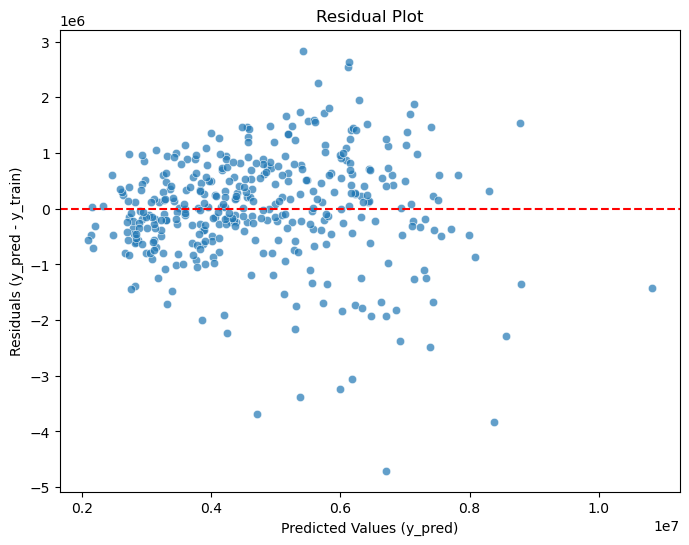

In [22]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
import seaborn as sns
import matplotlib.pyplot as plt

# Residuals (errors)
residuals = y_pred_train - y_train

# Plot residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_train, y=residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')  # Reference line at y=0
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (y_pred - y_train)")
plt.title("Residual Plot")
plt.show()


In [ ]:
#14  Predic on the test set
# Predict on the test set
y_pred_test = lr.predict(X_test)

# Display first few predictions
print("First 10 Predictions:", y_pred_test[:10])


In [ ]:
#15 Residual plot - plot y_pred in x axis and errors in y axis


In [ ]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_test)

# Calculate R Squared Value
r2 = r2_score(y_test, y_pred_test)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("R Squared Value (R²):", r2)


In [ ]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
def adjusted_r2(r2, n, k):
    """
    Calculate Adjusted R Squared
    :param r2: R Squared Value
    :param n: Number of observations (data points)
    :param k: Number of independent variables (features)
    :return: Adjusted R Squared Value
    """
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Get the number of samples (n) and features (k)
n = X_test.shape[0]  # Number of rows (observations)
k = X_test.shape[1]  # Number of features (independent variables)

# Calculate Adjusted R Squared
adj_r2 = adjusted_r2(r2, n, k)

# Print Adjusted R Squared Value
print("Adjusted R Squared Value:", adj_r2)


In [ ]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df

# List of independent variables (excluding 'price')
independent_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
                    'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
                    'parking', 'prefarea', 'furnishingstatus']

# Set up the figure
plt.figure(figsize=(20, 20))

# Create scatterplots in a grid
for i, col in enumerate(independent_vars):
    plt.subplot(4, 4, i + 1)
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'Price vs {col}')
    plt.tight_layout()

plt.suptitle("Scatterplots: Price vs Independent Variables", fontsize=20, y=1.02)
plt.show()
